# TUnfold: Basic usage

In [1]:
import ROOT
import utils

# Set the ROOT style
ROOT.gROOT.Macro("style.C")
utils.setTDRStyle()

Welcome to JupyROOT 6.10/09


Supply the input distribution to be unfolded as a 1-dimensional list for N bins, with each entry corresponding to the bin content.
Supply the response matrix where each row corresponds to a truth level bin.
The normalization of each row must be the acceptance efficiency of the corresponding bin (e.g. the normalization is 1 for resolution only unfolding).

In [2]:
# load histograms from ROOT file
f = ROOT.TFile.Open("../data/example.root")
data = f.Get("data")
response = f.Get("resmat")

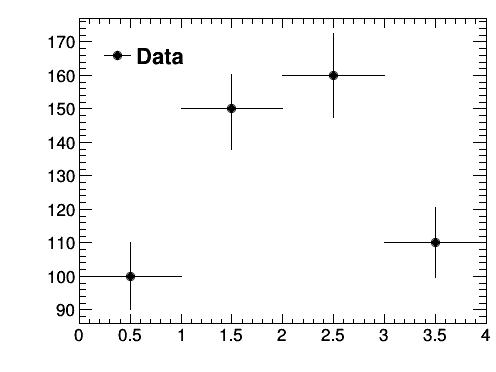

In [3]:
%jsroot off
c1 = ROOT.TCanvas('cc1','cc1',500,400)
data.Draw()
leg = utils.ROOT.TLegend(0.2,0.8,0.5,0.9)
leg.AddEntry(data,"Data")
leg.Draw("same")
c1.Draw()

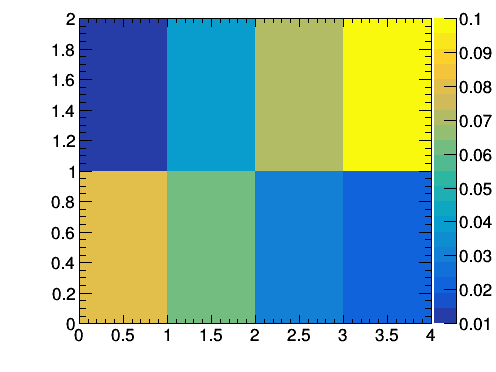

In [4]:
c2 = ROOT.TCanvas('c2','c2',500,400)
response.Draw("COLZ")
c2.SetRightMargin(0.13);
c2.Draw()

Create TUnfold instance using the response matrix

In [5]:
#tu = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert)
tu = ROOT.TUnfoldDensity(response,ROOT.TUnfold.kHistMapOutputVert, 
                         ROOT.TUnfold.kRegModeCurvature, 
                         ROOT.TUnfold.kEConstraintArea, 
                         ROOT.TUnfoldDensity.kDensityModeBinWidth)
if tu.SetInput(data)>=10000: 
    print " Something went wrong! "

Info in <TUnfold::SetConstraint>: fConstraint=1
Info in <TUnfold::TUnfold>: underflow and overflow bin do not depend on the input data
Info in <TUnfold::TUnfold>: 4 input bins and 2 output bins
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #0 (yaxis:[ufl])
Info in <TUnfoldDensity::TUnfold>: *NOT* unfolding bin #3 (yaxis:[ofl])
Info in <TUnfoldDensity::RegularizeOneDistribution>: regularizing yaxis regMode=3 densityMode=1 axisSteering=*[UOB]


Run the unfolding.

In [6]:
tu.DoUnfold(0)

0.46635880728224033

Retrieve the unfolded N-dimensional distribution in the form of a histogram.  Retrieve the total error matrix as well.

In [7]:
hUnfold = tu.GetOutput("Unfolded")
hErrMatTotal = tu.GetEmatrixTotal("EmatTotal")

In [9]:
print [hUnfold.GetBinContent(i) for i in range(1,hUnfold.GetNbinsX()+1)]
print [hErrMatTotal.GetBinContent(i,i) for i in range(1,hErrMatTotal.GetNbinsX()+1)]

[265.3727400639697, 254.62725993603033]
[38387.46101537107, 38376.71553524314]


For each unfolded bin, we can extract the mean and RMS.